In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

%matplotlib notebook

In [26]:
# Data Directory
data_loc = "Resources"

# Data File (CSV)
data_file_path = f"{data_loc}/spotify_dataset.csv"

# Read into DataFrame
data_df = pd.read_csv(data_file_path)

data_df.count()

Index                        1556
Highest Charting Position    1556
Number of Times Charted      1556
Week of Highest Charting     1556
Song Name                    1556
Streams                      1556
Artist                       1556
Artist Followers             1556
Song ID                      1556
Genre                        1556
Release Date                 1556
Weeks Charted                1556
Popularity                   1556
Danceability                 1556
Energy                       1556
Loudness                     1556
Speechiness                  1556
Acousticness                 1556
Liveness                     1556
Tempo                        1556
Duration (ms)                1556
Valence                      1556
Chord                        1556
dtype: int64

In [27]:
# Update any blank cells to be nan so the rows can be dropped - we only want records with all the metrics intact
data_df.replace("", np.nan, inplace=True)
data_df.replace(" ", np.nan, inplace=True)

# Delete any records with null values
data_df = data_df.dropna()

data_df.count()



Index                        1545
Highest Charting Position    1545
Number of Times Charted      1545
Week of Highest Charting     1545
Song Name                    1545
Streams                      1545
Artist                       1545
Artist Followers             1545
Song ID                      1545
Genre                        1545
Release Date                 1545
Weeks Charted                1545
Popularity                   1545
Danceability                 1545
Energy                       1545
Loudness                     1545
Speechiness                  1545
Acousticness                 1545
Liveness                     1545
Tempo                        1545
Duration (ms)                1545
Valence                      1545
Chord                        1545
dtype: int64

In [28]:
#data_df.loc[data_df['Song Name'] == 'NOT SOBER (feat. Polo G & Stunna Gambino)']

# Render
data_df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [30]:
data_df.shape

(1545, 23)

In [38]:
# Separate out genres so there is one per record

genre_df = data_df.copy()

genre_df['Genre']=genre_df['Genre'].astype(str)
genre_df.loc[genre_df["Genre"] == "[]", "Genre"] = np.nan
genre_df["Genre"] = genre_df["Genre"].fillna(0)

# remove unneccessary characters
genre_df["Genre"] = genre_df["Genre"].str.replace("[", "", regex=True)
genre_df["Genre"] = genre_df["Genre"].str.replace("]", "", regex=True)
genre_df["Genre"] = genre_df["Genre"].str.replace("'", "", regex=True)

# split on commas
genre_df["Genre"] = genre_df["Genre"].str.split(",")

# separte and create rows based on genres. There will now be a row for each 
# genre a given song has so we can easily create charts based on genre
genre_df = genre_df.explode('Genre')

# Render
genre_df.head()
#genre_df.columns

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,italian pop,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,italian pop,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,post-teen pop,...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,brega funk,...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,funk carioca,...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,pop,...,0.448,0.603,-7.176,0.064,0.433,0.0862,205.272,221307,0.422,G


<IPython.core.display.Javascript object>


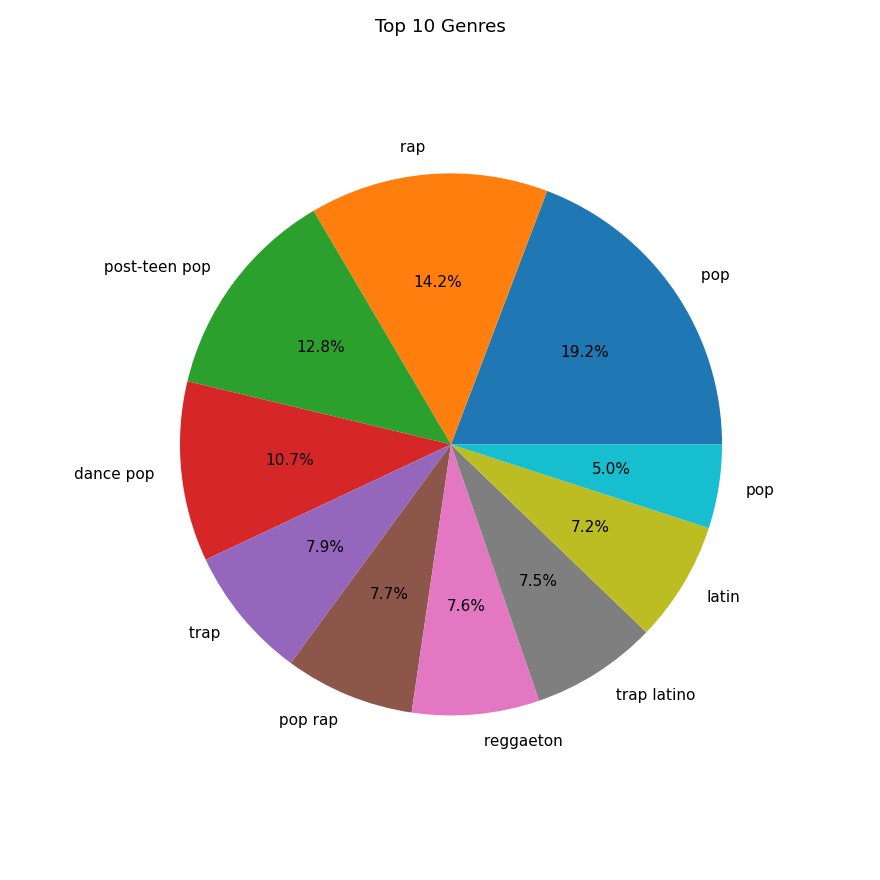

array([<AxesSubplot:>], dtype=object)

In [52]:
genre_df['Genre'].value_counts()[:10].plot.pie(subplots=True, ylabel="", title="Top 10 Genres", autopct='%1.1f%%', figsize=(8,8))




